1. какие команды увеличивают посещяемость домашней команды и насколько?
1. самый большой прирост?
1. суммарная посещаемость для каждой команды
2. какие домашние команды наименее этому подвержены?

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd

# VTB

In [2]:
def prepare_df(fname):
    df = pd.read_csv(fname)
    df['home_mean_att'] = df.groupby('home')['attendance'].transform(np.mean).astype(int)
    df['guest_mean_att'] = df.groupby('guest')['attendance'].transform(np.mean).astype(int)
    df['guest_factor'] = df.attendance - df.home_mean_att # 
    df['guest_factor_pct'] = (df.attendance - df.home_mean_att) / (df.home_mean_att) * 100
    print(df.shape)
    return df
df_vtb = prepare_df('vtb_attendance_2018.csv')
df_vtb.head(3)

(182, 8)


,home,guest,attendance,game_date,home_mean_att,guest_mean_att,guest_factor,guest_factor_pct
0,ПАРМА,ЦСКА,6399,2019-02-15,4207,3515,2192,52.103637
1,ПАРМА,Калев,5610,2019-04-14,4207,2314,1403,33.349180
2,Локомотив-Кубань,ЦСКА,5596,2018-11-11,3039,3515,2557,84.139520


,home,guest,attendance,game_date,home_mean_att,guest_mean_att,guest_factor,guest_factor_pct
140,ВЭФ,ЦСКА,1100,2018-12-23,670,3515,430,64.179104
61,Енисей,ЦСКА,2570,2018-05-10,1242,3515,1328,106.924316
4,УНИКС,ЦСКА,5144,2019-11-02,3420,3515,1724,50.409357
0,ПАРМА,ЦСКА,6399,2019-02-15,4207,3515,2192,52.103637
39,ВЭФ,Калев,3150,2018-10-31,670,2314,2480,370.149254
2,Локомотив-Кубань,ЦСКА,5596,2018-11-11,3039,3515,2557,84.139520
8,Калев,ЦСКА,4900,2018-12-30,1653,3515,3247,196.430732


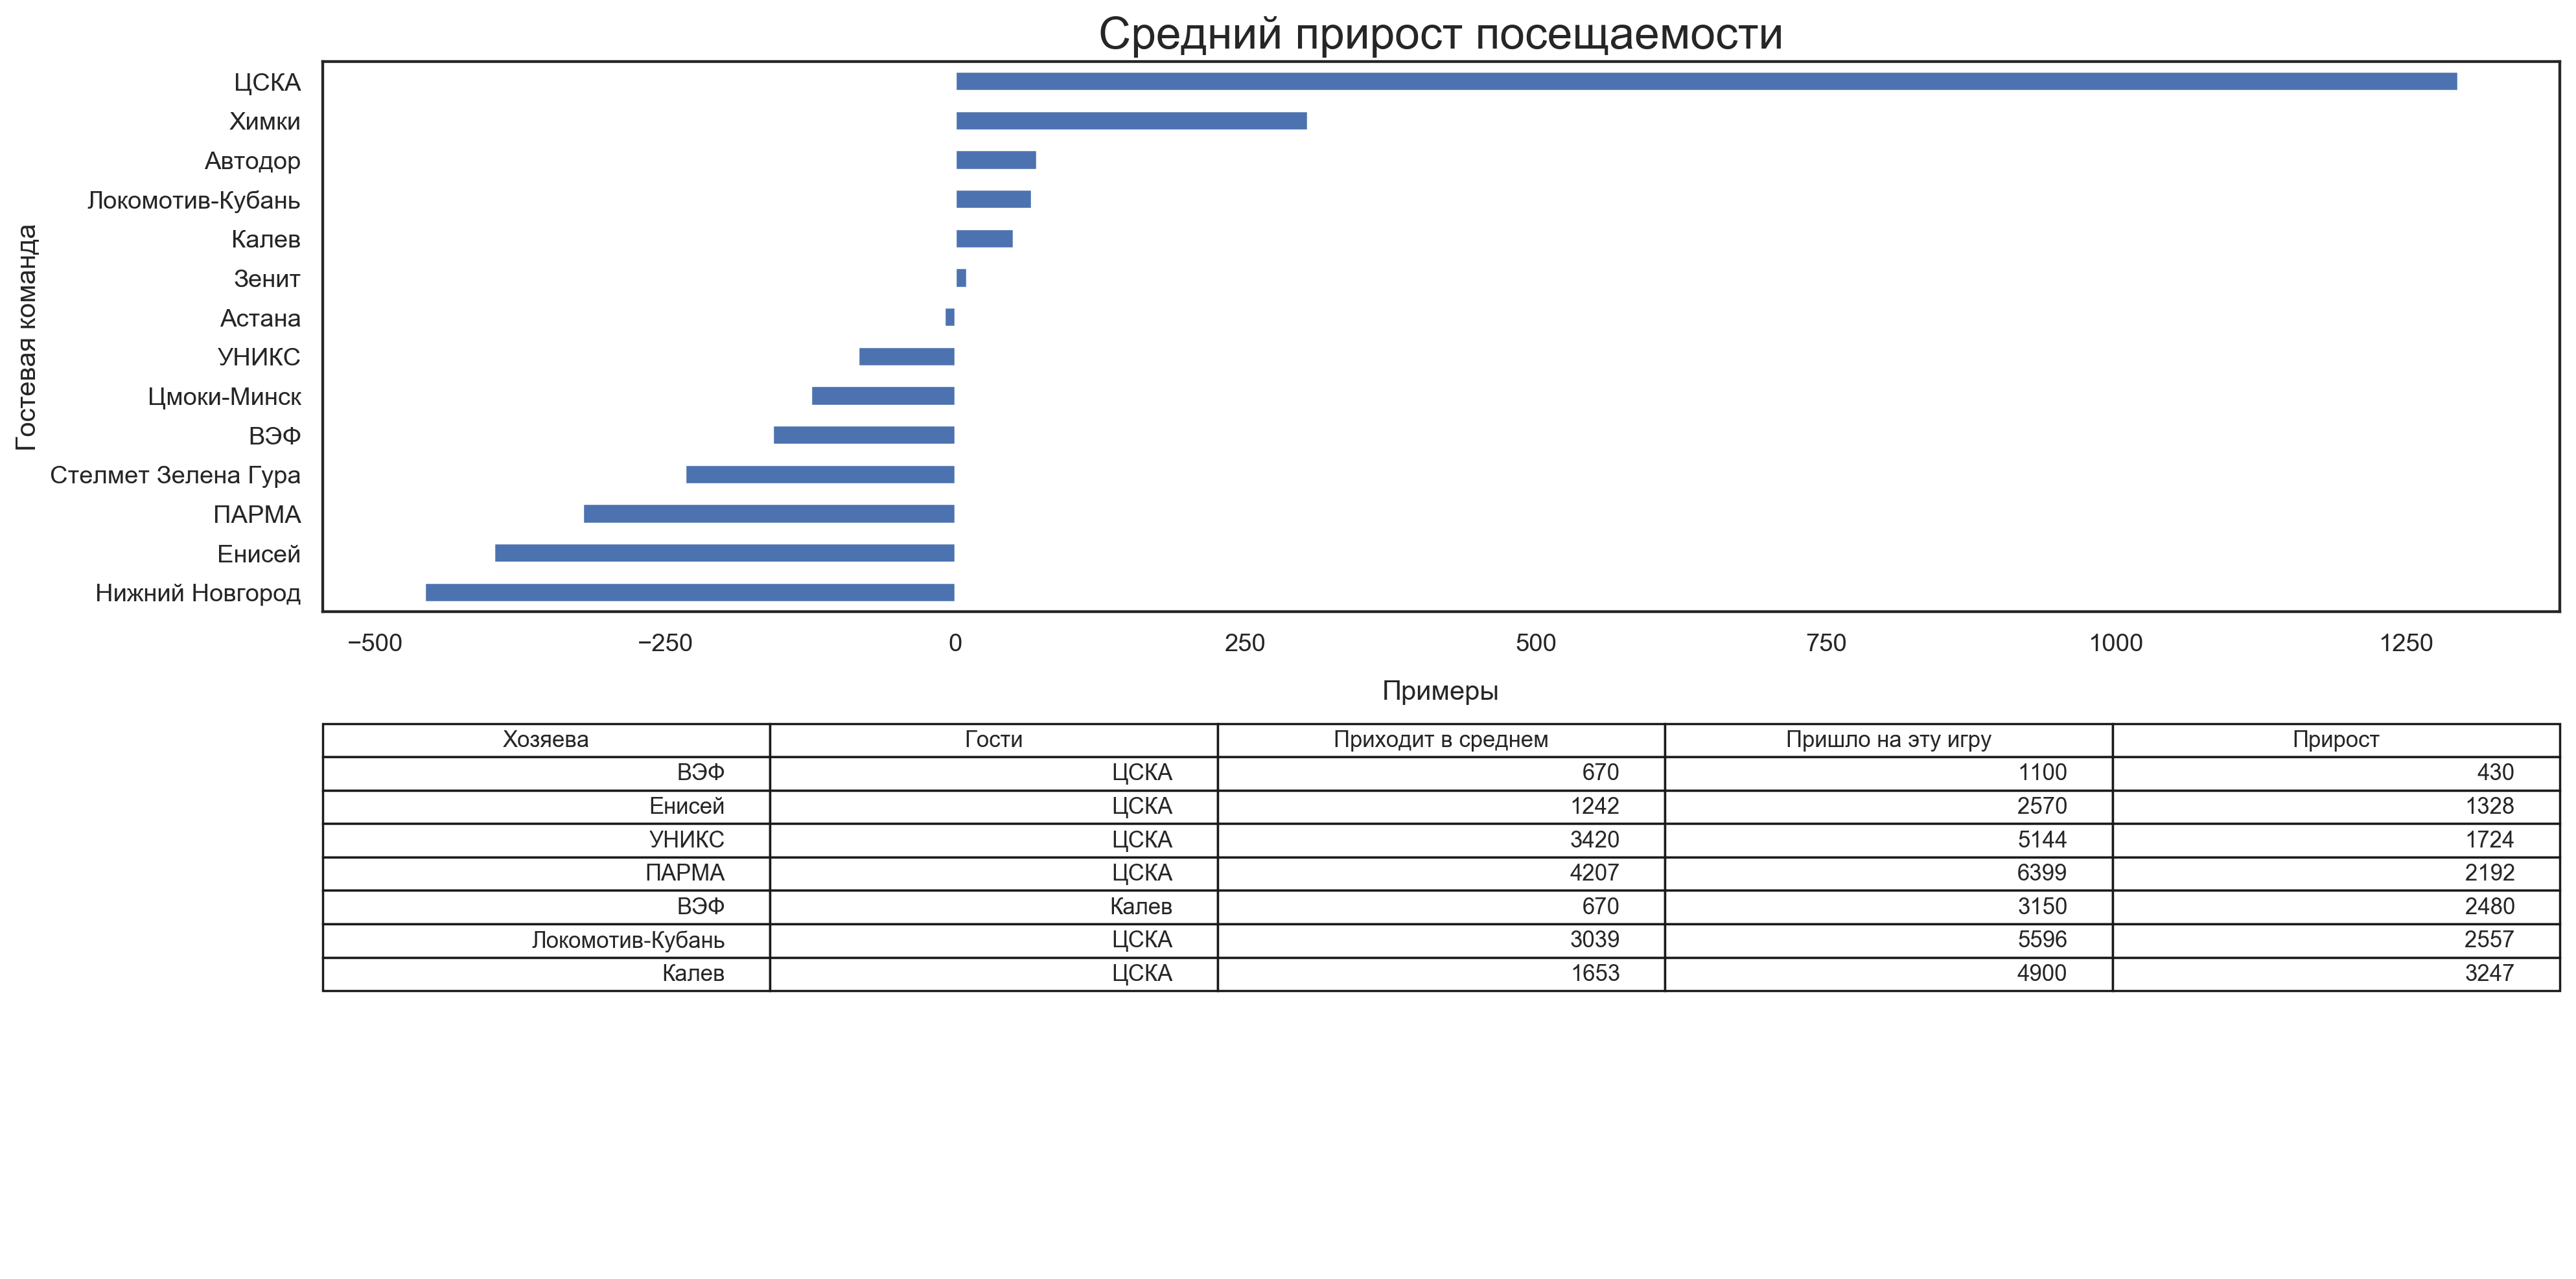

In [3]:
def plot_guest_att(df, figsize=(16, 8), dpi=100, save=None):
    extremes = pd.concat((df.iloc[df.guest_factor.argsort()[-5:].values],
                          df.iloc[df.guest_factor_pct.argsort()[-5:].values]))
    extremes = (extremes.drop_duplicates()
                .sort_values('guest_factor'))
    fig, ax = plt.subplots(2, 1, figsize=figsize, dpi=dpi)
    
    ax[1].table(cellText=extremes[['home', 'guest', 'home_mean_att', 'attendance', 'guest_factor']].values,
                colLabels=['Хозяева', 'Гости', 'Приходит в среднем', 'Пришло на эту игру', 'Прирост'], 
                loc='upper center')
    ax[1].set_title('Примеры')
    ax[1].axis('off')
    ax[1].axis('tight')
    
    by_guest = df.groupby('guest')['guest_factor'].mean().sort_values()
    by_guest.plot.barh(ax=ax[0])
    ax[0].set_title('Средний прирост посещаемости', fontsize=20)
    ax[0].set_ylabel('Гостевая команда')
    fig.tight_layout()
    if save:
        fig.savefig(save, bbox_inches = "tight")
    return extremes

plot_guest_att(df_vtb, dpi=250, save='guest_vtb.png')

,guest_sum,home_sum,total_sum
guest,,,
ПАРМА,22703,54700,77403
ЦСКА,45704,28747,74451
Зенит,27620,46765,74385
УНИКС,26572,44465,71037
Локомотив-Кубань,28898,39517,68415
Химки,32452,33532,65984
Автодор,29851,27877,57728
Стелмет Зелена Гура,25662,31166,56828
Калев,30083,21500,51583


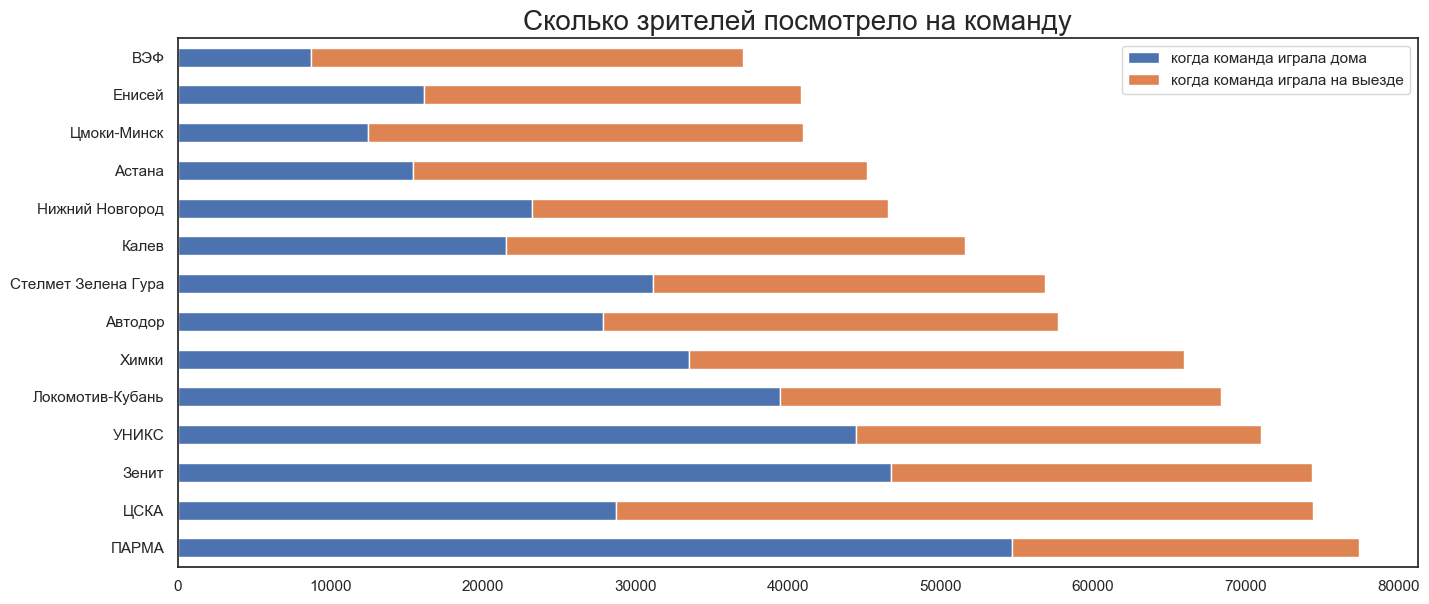

In [4]:
def plot_totals(df, figsize=(16, 7), dpi=100, save=None):
    totals = pd.merge(df.groupby('guest')['attendance'].agg(guest_sum=np.sum),
                      df.groupby('home')['attendance'].agg(home_sum=np.sum), 
                      left_index=True, right_index=True)
    totals['total_sum'] = totals.guest_sum + totals.home_sum
    totals.sort_values('total_sum', ascending=False, inplace=True)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    ax = totals[['home_sum', 'guest_sum']].plot.barh(stacked=True, ax=ax)
    ax.legend(labels=['когда команда играла дома', 'когда команда играла на выезде'])
    ax.set_title('Сколько зрителей посмотрело на команду', fontsize=20)
    ax.set_ylabel('');
    if save:
        fig.savefig(save, bbox_inches = "tight")
    return totals

plot_totals(df_vtb, dpi=100, save='totals_vtb.png')

In [5]:
def get_home_coefvar(df, n=3):
    home_coefvar = df.groupby('home')['attendance'].agg(lambda s: np.std(s) / np.mean(s)).sort_values()
    return pd.concat((home_coefvar.head(n), home_coefvar.tail(n)))

get_home_coefvar(df_vtb)

home
Стелмет Зелена Гура    0.183974
Химки                  0.192568
Автодор                0.221025
ЦСКА                   0.359335
Калев                  0.632438
ВЭФ                    1.118912
Name: attendance, dtype: float64

# EL

In [6]:
df_el = prepare_df('el_attendance_2018.csv')
df_el.head(3)

(240, 8)


,home,guest,attendance,game_date,home_mean_att,guest_mean_att,guest_factor,guest_factor_pct
0,Buducnost VOLI Podgorica,AX Armani Exchange Olimpia Milan,4409,2018-10-12,4791,7443,-382,-7.973283
1,CSKA Moscow,FC Barcelona Lassa,12023,2018-10-11,7240,9599,4783,66.063536
2,Panathinaikos OPAP Athens,Maccabi FOX Tel Aviv,10150,2018-10-11,12152,7374,-2002,-16.474654


,home,guest,attendance,game_date,home_mean_att,guest_mean_att,guest_factor,guest_factor_pct
1,CSKA Moscow,FC Barcelona Lassa,12023,2018-10-11,7240,9599,4783,66.063536
172,CSKA Moscow,Real Madrid,12341,2019-02-08,7240,9634,5101,70.455801
46,Panathinaikos OPAP Athens,Olympiacos Piraeus,17345,2018-11-09,12152,8945,5193,42.733706
85,Anadolu Efes Istanbul,Real Madrid,12289,2018-12-07,6874,9634,5415,78.775095
224,Panathinaikos OPAP Athens,Real Madrid,18003,2019-03-28,12152,9634,5851,48.148453
197,Anadolu Efes Istanbul,FC Barcelona Lassa,14161,2019-03-08,6874,9599,7287,106.008147
208,Anadolu Efes Istanbul,CSKA Moscow,14258,2019-03-19,6874,9618,7384,107.419261


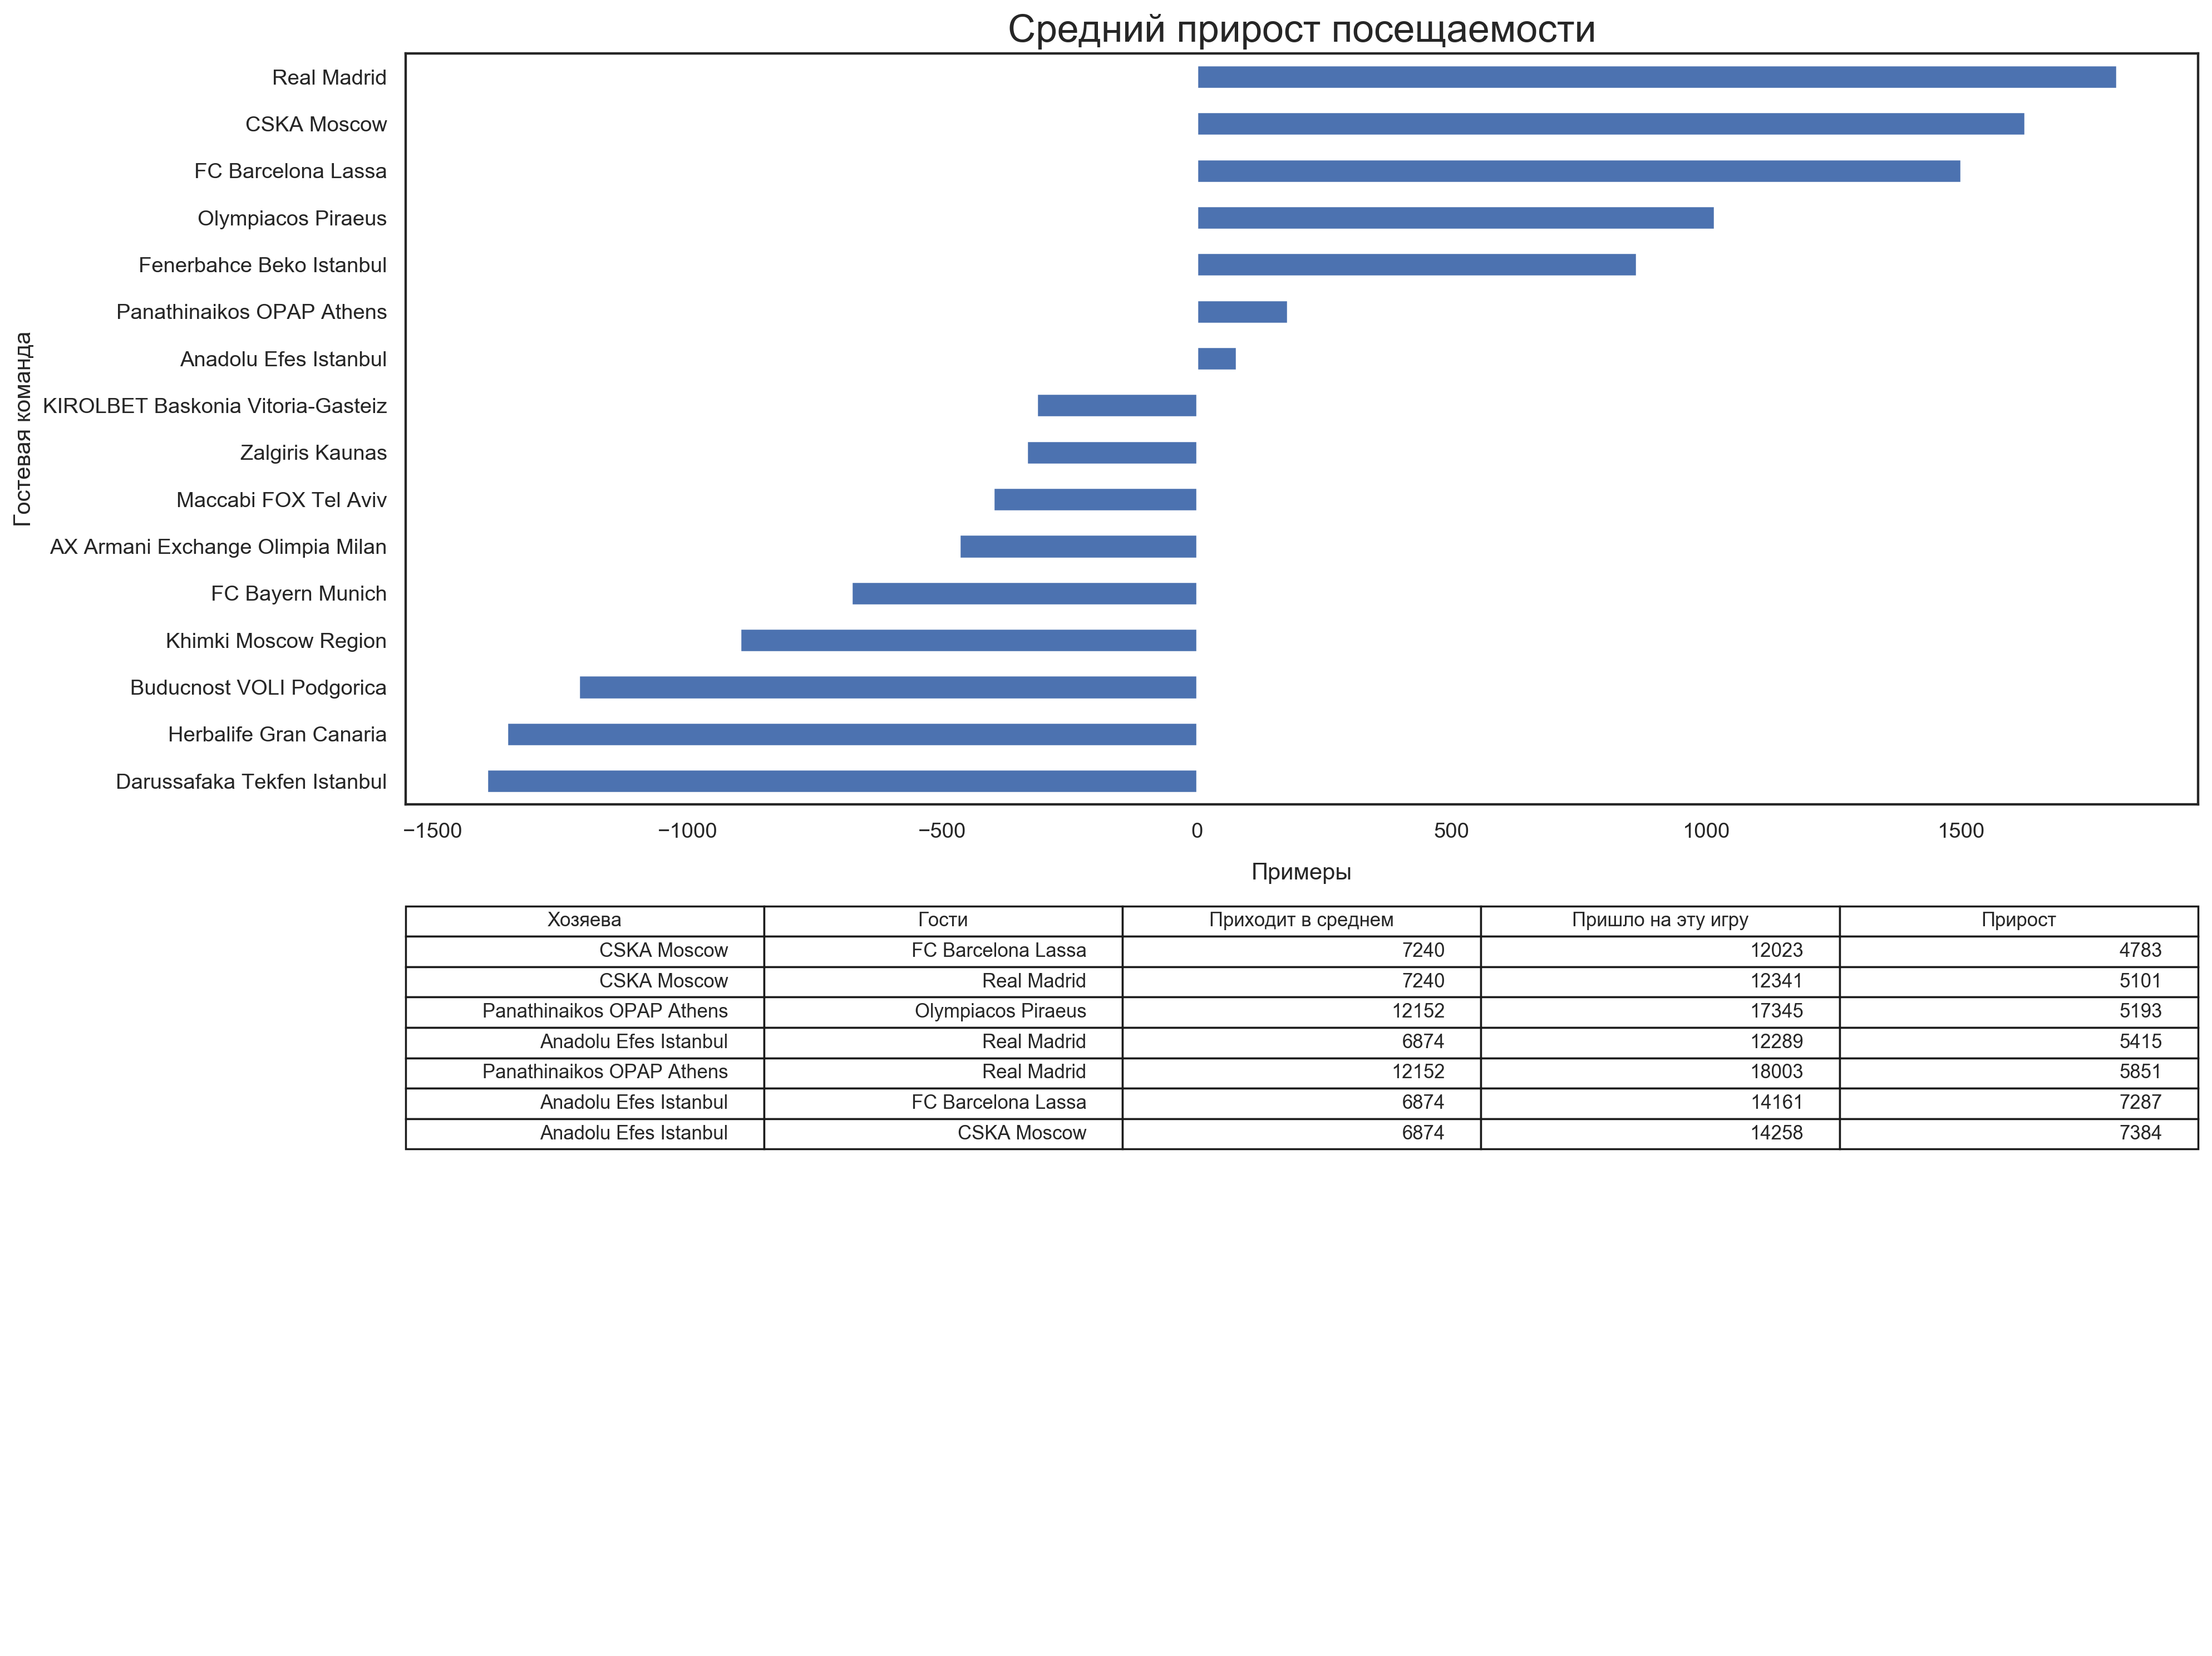

In [7]:
plot_guest_att(df_el, figsize=(16, 12), dpi=250, save='guest_el.png')

,guest_sum,home_sum,total_sum
guest,,,
Zalgiris Kaunas,107391,221048,328439
Panathinaikos OPAP Athens,117663,182291,299954
Real Madrid,144516,145547,290063
Fenerbahce Beko Istanbul,129596,157391,286987
KIROLBET Baskonia Vitoria-Gasteiz,111495,163933,275428
Maccabi FOX Tel Aviv,110620,157826,268446
Olympiacos Piraeus,134182,123042,257224
CSKA Moscow,144279,108605,252884
AX Armani Exchange Olimpia Milan,111656,127402,239058


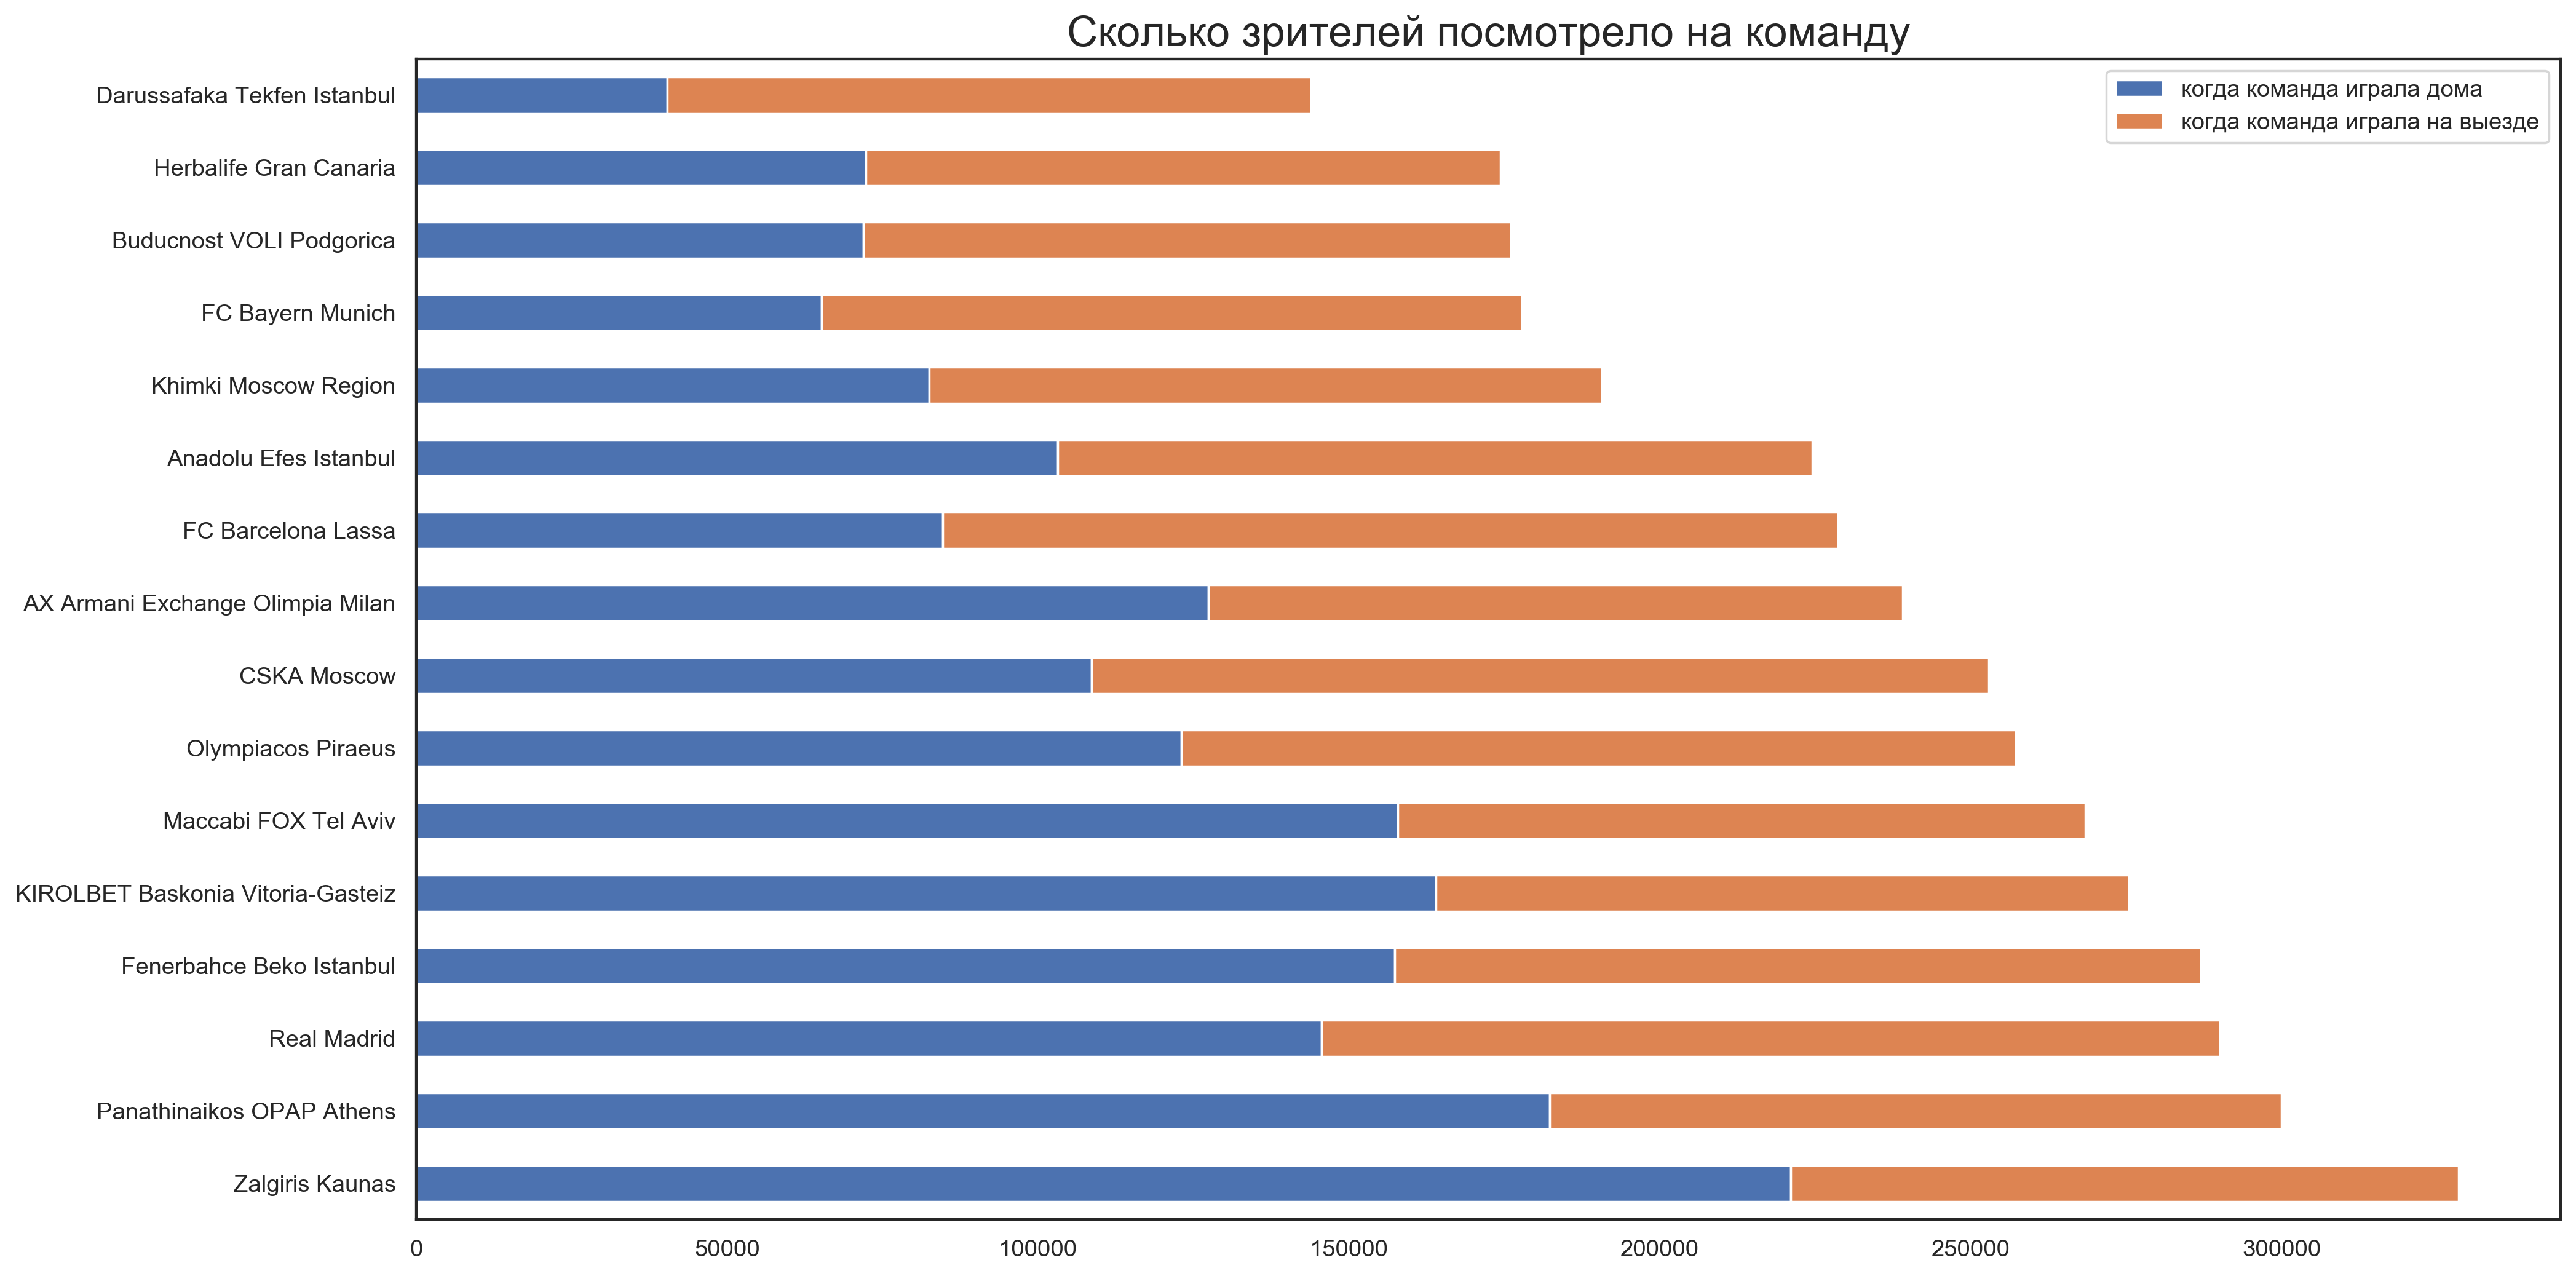

In [8]:
plot_totals(df_el, figsize=(18, 10), dpi=250, save='totals_el.png')

In [9]:
get_home_coefvar(df_el)

home
Zalgiris Kaunas                      0.034721
Maccabi FOX Tel Aviv                 0.039707
KIROLBET Baskonia Vitoria-Gasteiz    0.073573
Darussafaka Tekfen Istanbul          0.310795
CSKA Moscow                          0.346014
Anadolu Efes Istanbul                0.543251
Name: attendance, dtype: float64

# NBA

In [10]:
df_nba = prepare_df('nba_attendance_2018.csv')
df_nba.head(3)

(1230, 8)


,home,guest,attendance,game_date,home_mean_att,guest_mean_att,guest_factor,guest_factor_pct
0,MEM,GSW,17794,2019-04-10,15569,18790,2225,14.291220
1,CHA,ORL,17719,2019-04-10,16501,17659,1218,7.381371
2,NYK,DET,19812,2019-04-10,19002,17819,810,4.262709


,home,guest,attendance,game_date,home_mean_att,guest_mean_att,guest_factor,guest_factor_pct
708,MIN,ATL,18978,2018-12-28,15305,17786,3673,23.998693
1212,MIN,CLE,18978,2018-10-19,15305,17632,3673,23.998693
602,MIN,DAL,18978,2019-01-11,15305,18073,3673,23.998693
641,MIN,LAL,18978,2019-01-06,15305,18862,3673,23.998693
100,MIN,GSW,18978,2019-03-29,15305,18790,3673,23.998693
1007,MIN,POR,18978,2018-11-16,15305,17950,3673,23.998693
1220,DET,BKN,20332,2018-10-17,16486,18085,3846,23.328885
894,DET,GSW,20332,2018-12-01,16486,18790,3846,23.328885
202,DET,LAL,20768,2019-03-15,16486,18862,4282,25.973553


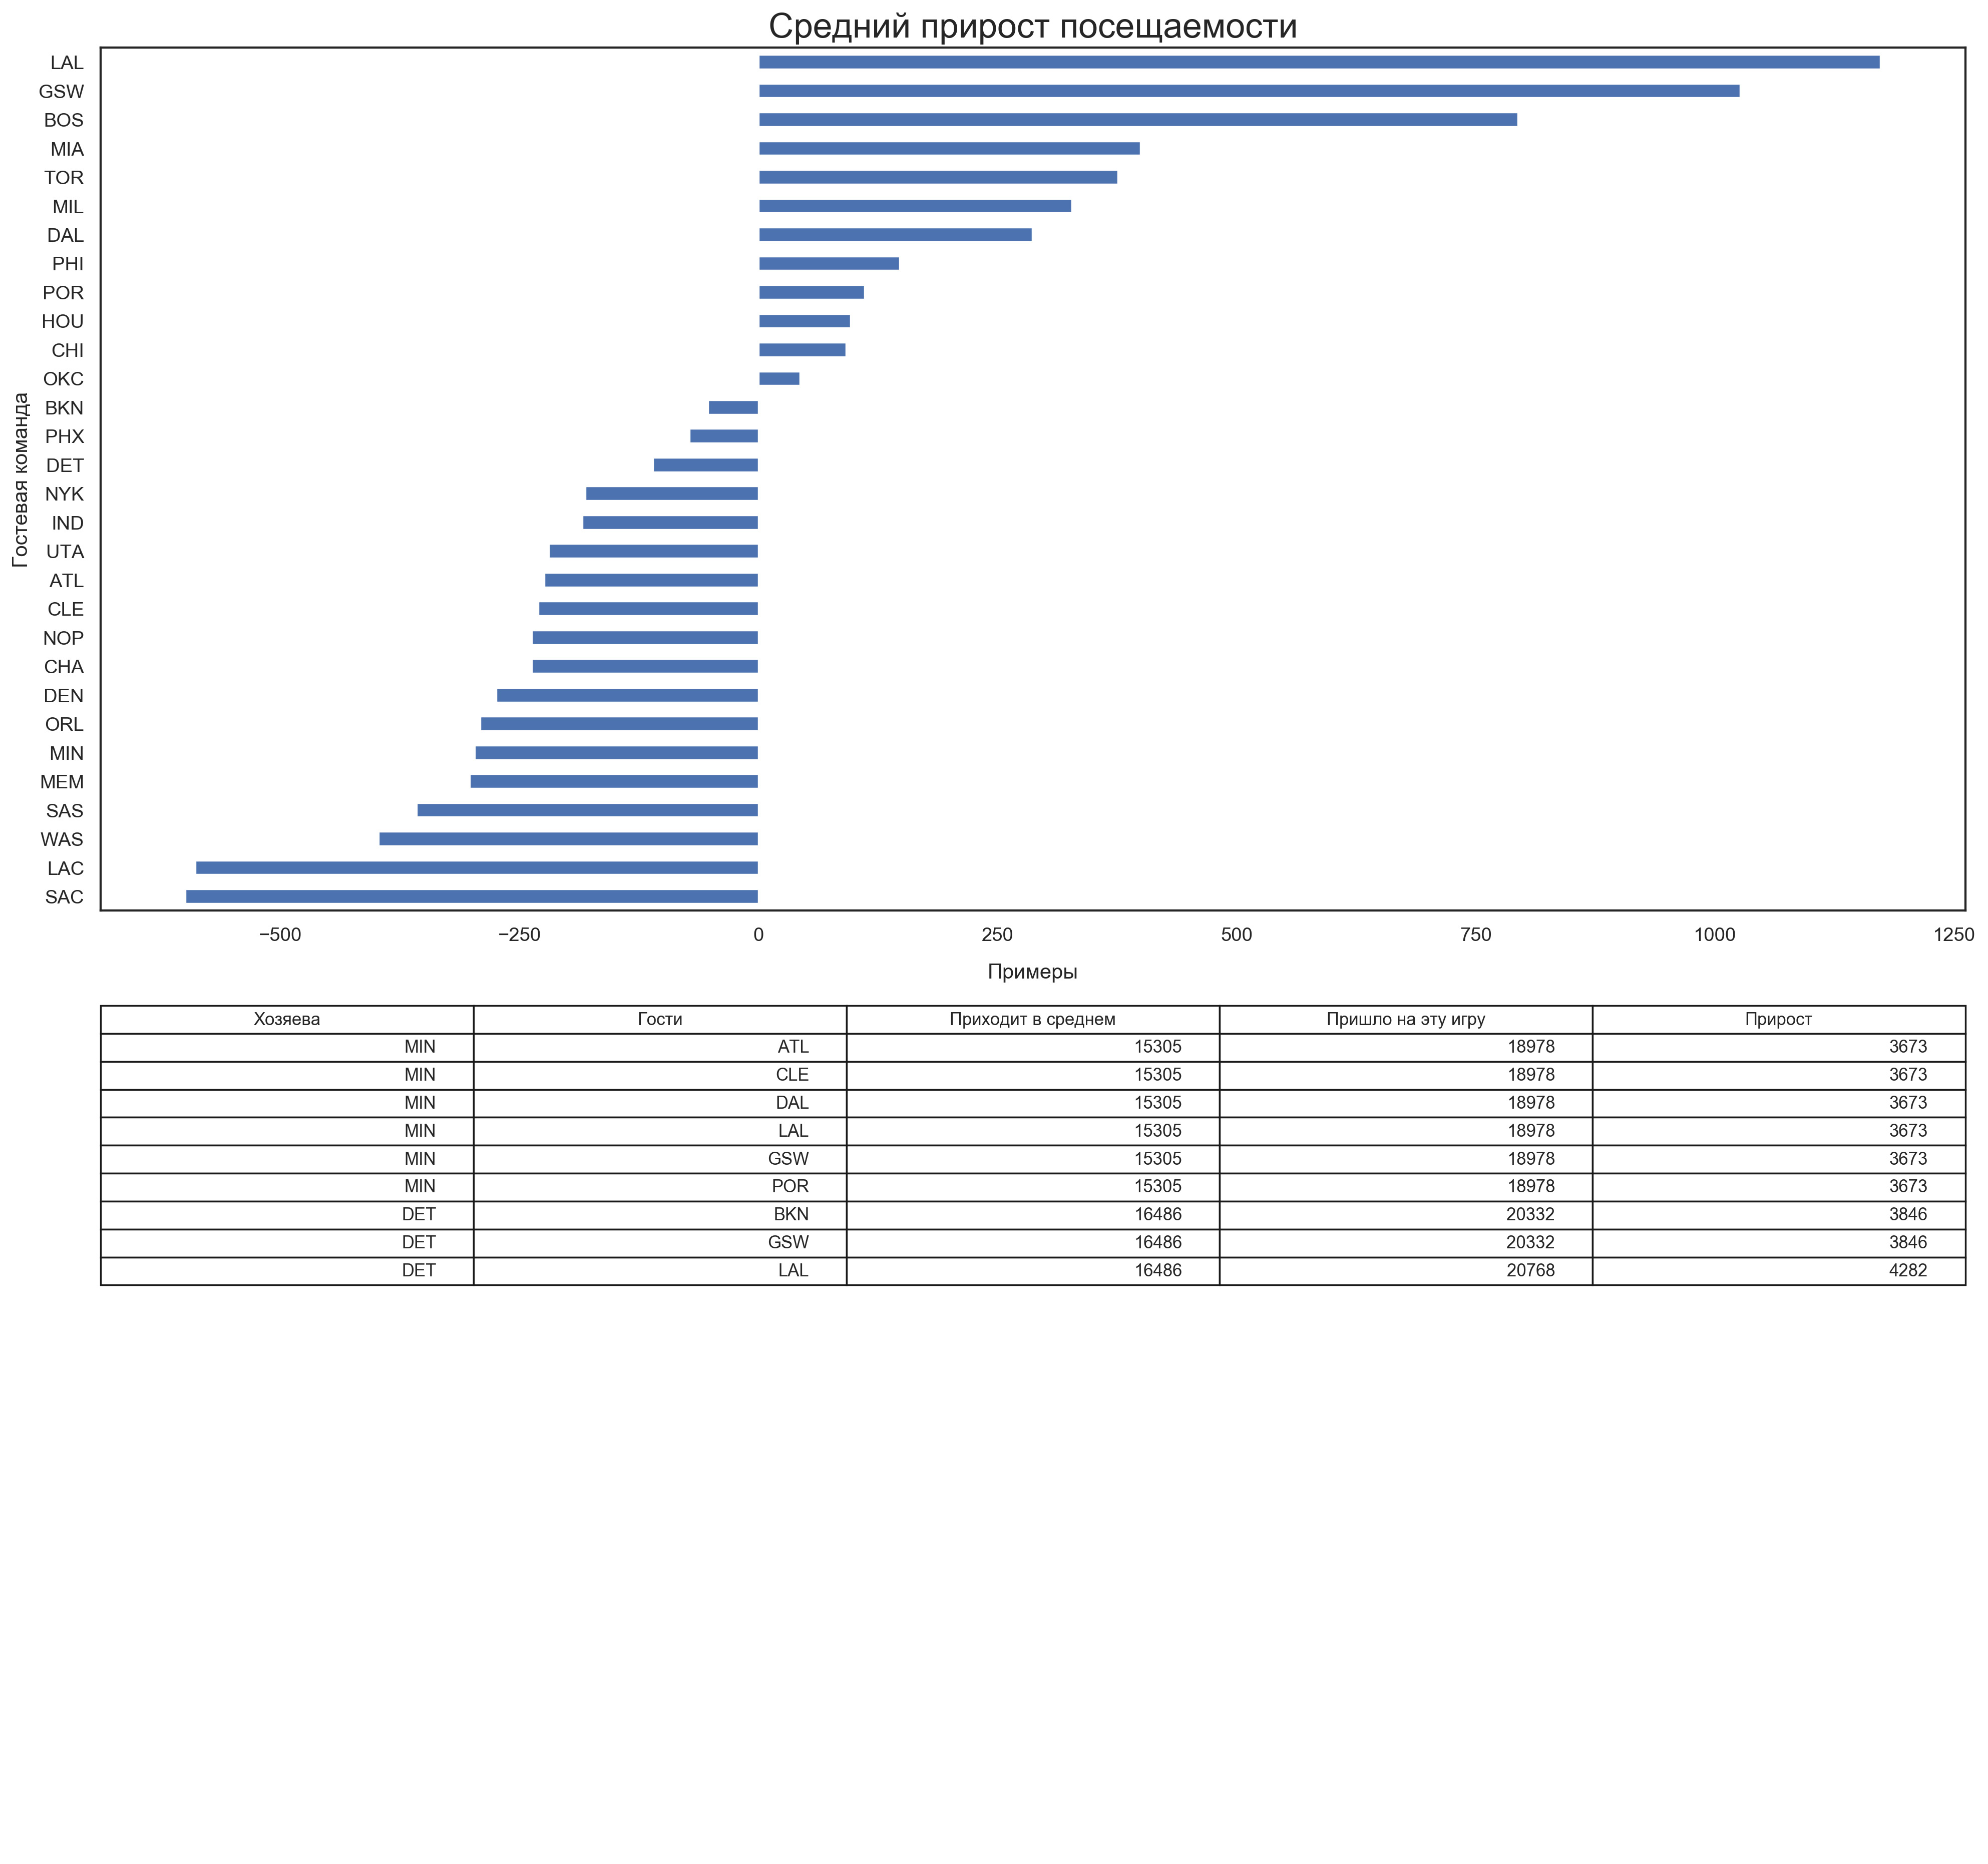

In [11]:
plot_guest_att(df_nba, figsize=(16, 15), dpi=250, save='guest_nba.png')

,guest_sum,home_sum,total_sum
guest,,,
GSW,770397,803436,1573833
PHI,733699,838342,1572041
DAL,741033,820569,1561602
TOR,747839,812822,1560661
CHI,730710,823475,1554185
LAL,773355,778877,1552232
MIA,745217,805264,1550481
POR,735976,799345,1535321
BOS,765533,763584,1529117


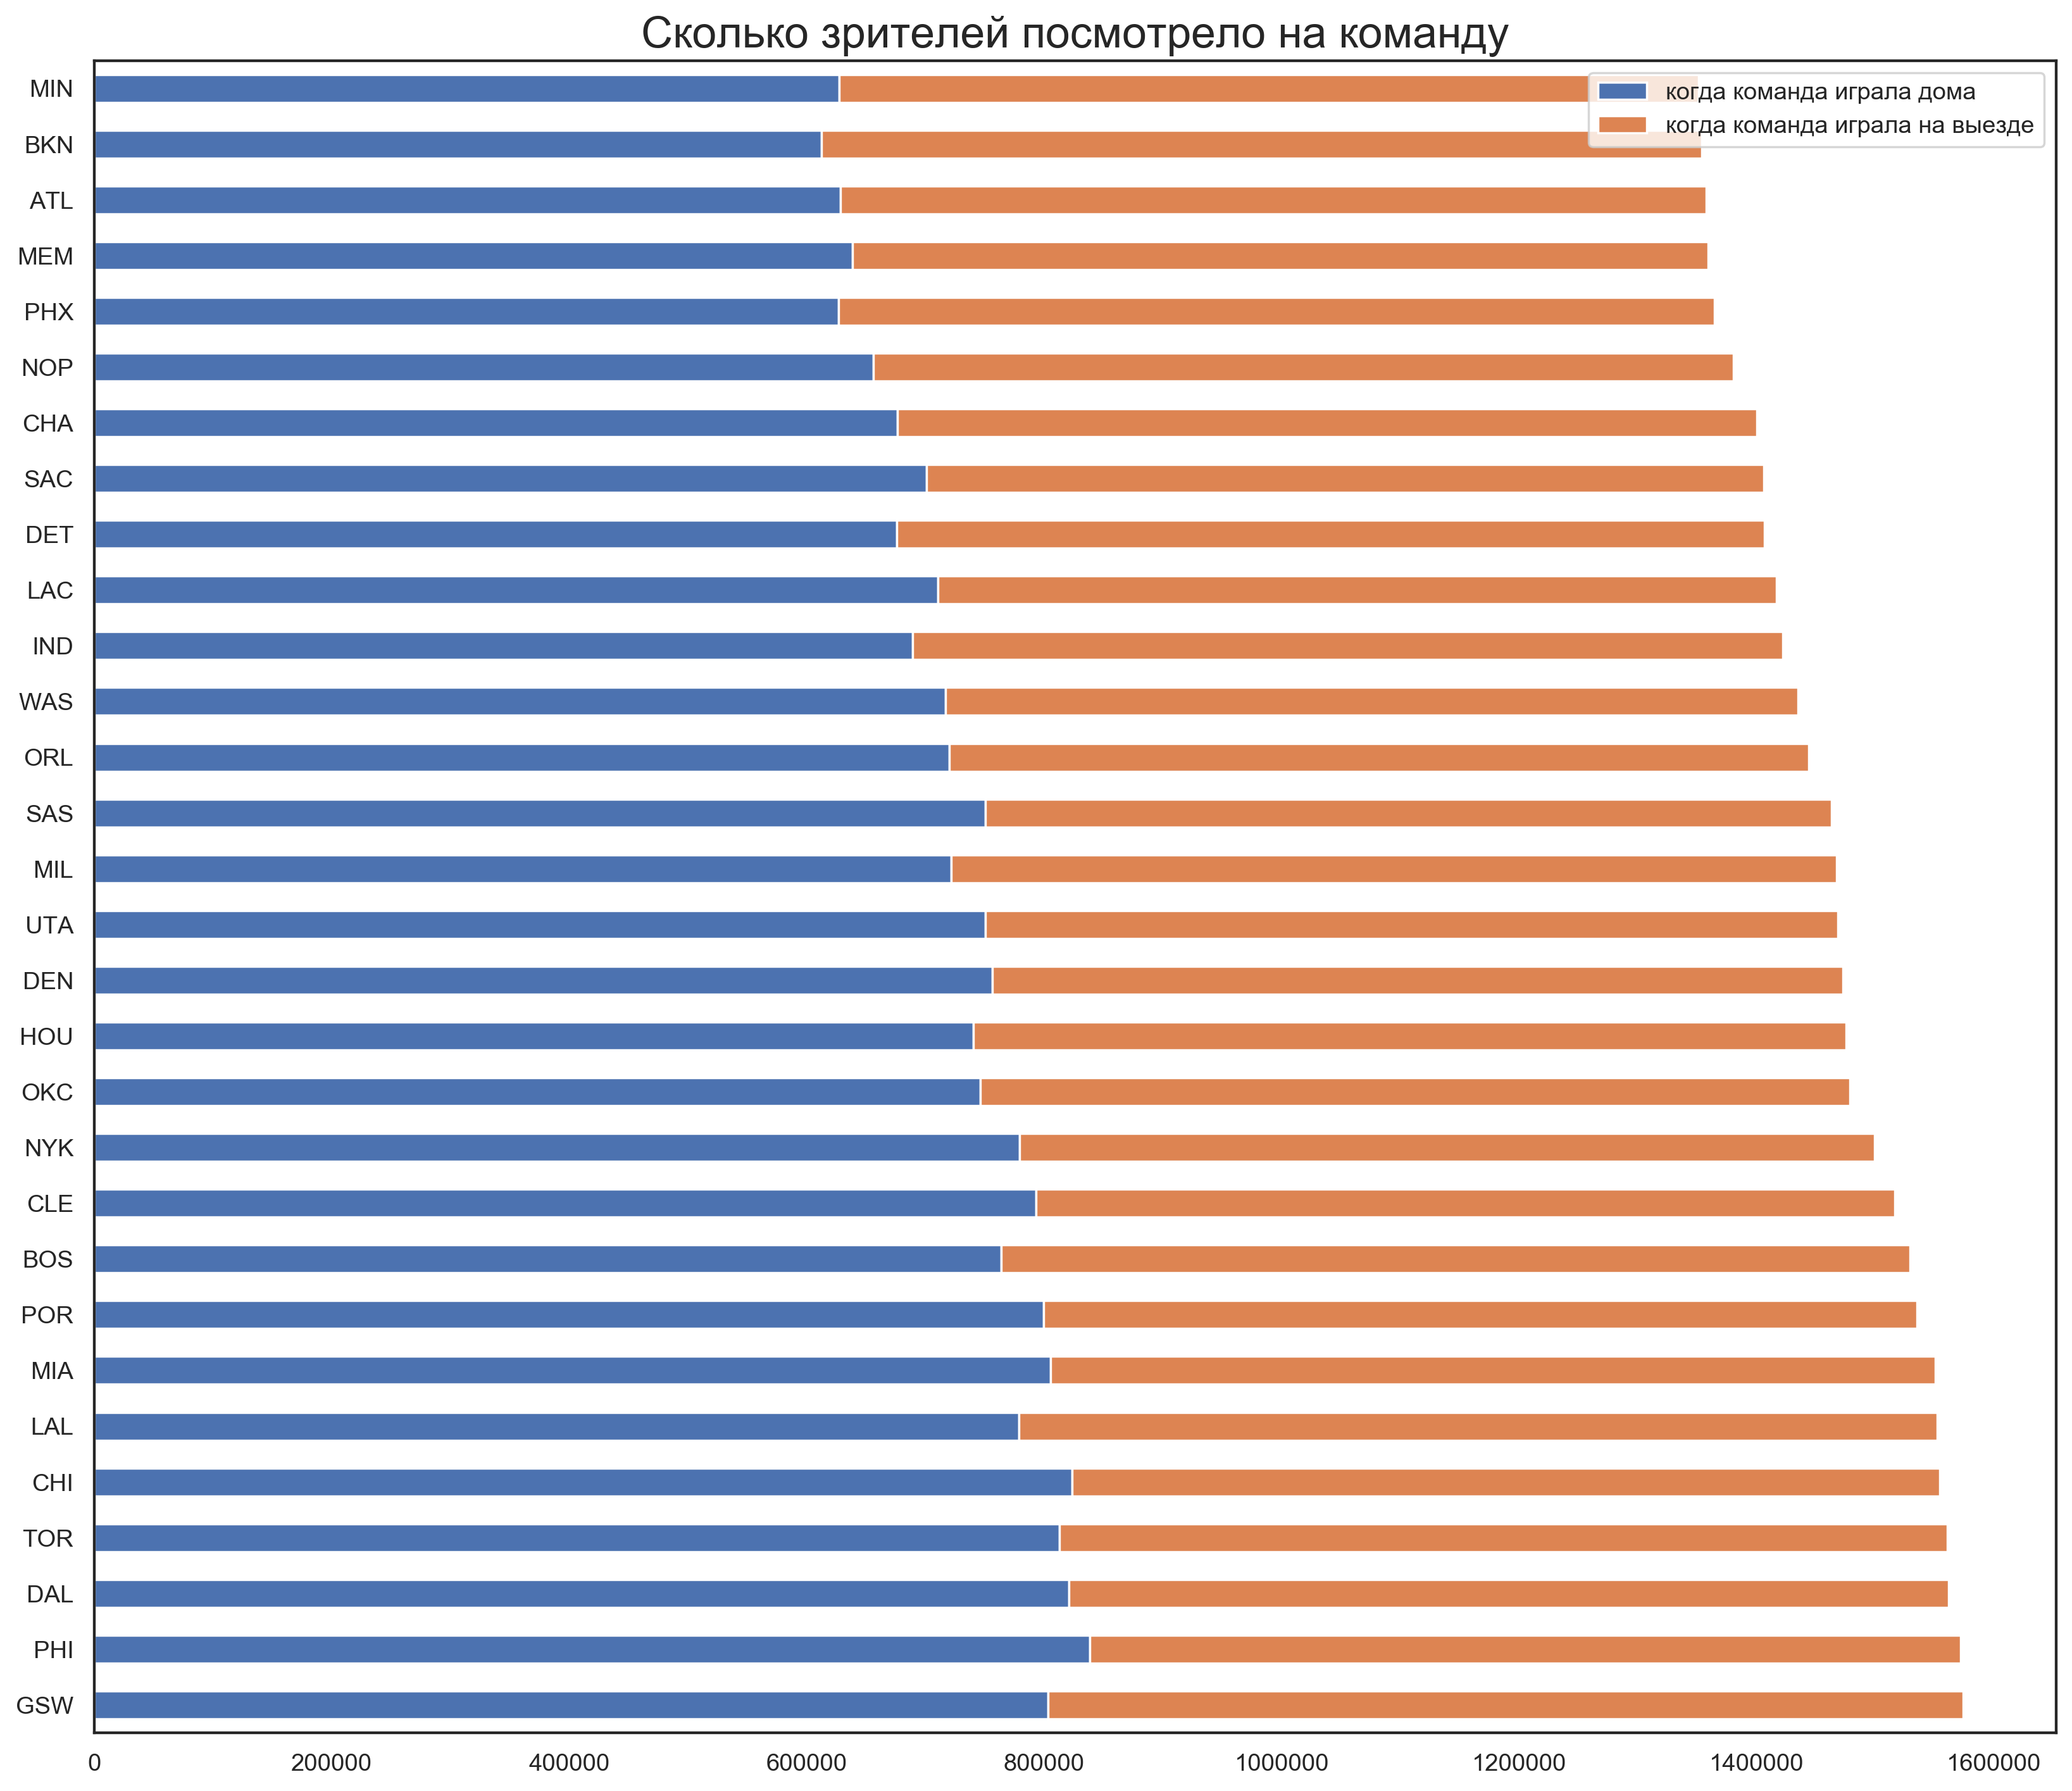

In [12]:
plot_totals(df_nba, figsize=(16, 14), dpi=250, save='totals_nba.png')

In [13]:
get_home_coefvar(df_nba, n=7)

home
BOS    0.000000
UTA    0.000000
OKC    0.000000
GSW    0.000000
LAL    0.000000
HOU    0.000781
TOR    0.003531
MEM    0.099297
PHX    0.112022
WAS    0.120083
CHA    0.122576
BKN    0.130256
DET    0.135036
MIN    0.185203
Name: attendance, dtype: float64

In [14]:
df_nba.query('home == "HOU"')

,home,guest,attendance,game_date,home_mean_att,guest_mean_att,guest_factor,guest_factor_pct
33,HOU,PHX,18055,2019-04-07,18058,17982,-3,-0.016613
46,HOU,NYK,18055,2019-04-05,18058,17566,-3,-0.016613
88,HOU,SAC,18055,2019-03-30,18058,17199,-3,-0.016613
106,HOU,DEN,18055,2019-03-28,18058,17474,-3,-0.016613
147,HOU,SAS,18055,2019-03-22,18058,17381,-3,-0.016613
185,HOU,MIN,18055,2019-03-17,18058,17647,-3,-0.016613
198,HOU,PHX,18055,2019-03-15,18058,17982,-3,-0.016613
213,HOU,GSW,18122,2019-03-13,18058,18790,64,0.354414
225,HOU,CHA,18055,2019-03-11,18058,17648,-3,-0.016613
248,HOU,PHI,18055,2019-03-08,18058,17895,-3,-0.016613
